# Научно-исследовательская работа
###  Алцыбеева Маргарита, ИУ5-62Б  
В качестве набора данных мы будем использовать набор данных по определению качества красного вина - https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

Датасет состоит из одного файла:  
winequality-red.csv - большая выборка вин с различными параметрами
Файл содержит следующие колонки:

* fixed acidity - фиксированная кислотность вина (содержание нелетучих кислот в вине) в %.
* volatile acidity - летучая кислотность вина в %.
* citric acid - содержание лимонной кислоты в %.
* residual sugar - содержание сахара в %.
* chlorides - содержание хлоридов в вине в %.
* free sulfur dioxide - общее количество свободного диоксида серы в вине (который еще не вступил в реакцию).
* total sulfur dioxide - общее количество диоксида серы в литре.
* density - плотность.
* pH - значение по шкале pH (кислотность).
* sulphates - доля сульфатов.
* alcohol - содержание алкоголя в %.
* quality - целевой признак, качество вина, измеряемое оценкой от 1 до 10.

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
sns.set(style="ticks")

import warnings
warnings.filterwarnings('ignore')

## Загрузка данных  
Загрузим файлы датасета в помощью библиотеки Pandas.

In [2]:
data = pd.read_csv('/home/margarita/WineQT.csv')

Удалим дубликаты записей

In [3]:
data = data.drop_duplicates()

## Проведение разведочного анализа данных.   
Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

Основные характеристики датасета

In [4]:
# Первые 5 строк датасета
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
# Размер  датасета - 1143 строк, 13 колонок
data.shape

(1143, 13)

In [6]:
# Список колонок
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [7]:
# Список колонок с типами данных 
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [8]:
# Проверим наличие пустых значений
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

### Вывод.   
Представленный набор данных не содержит пропусков.

### Построение графиков для понимания структуры данных

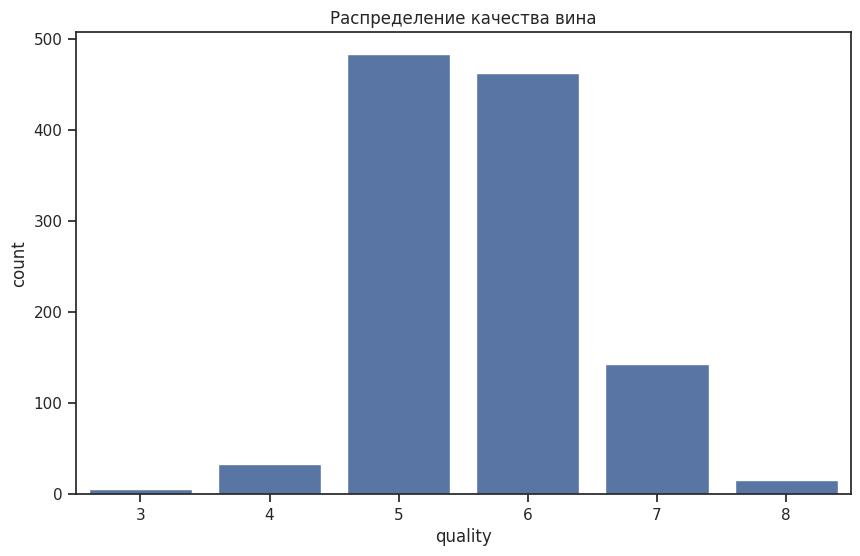

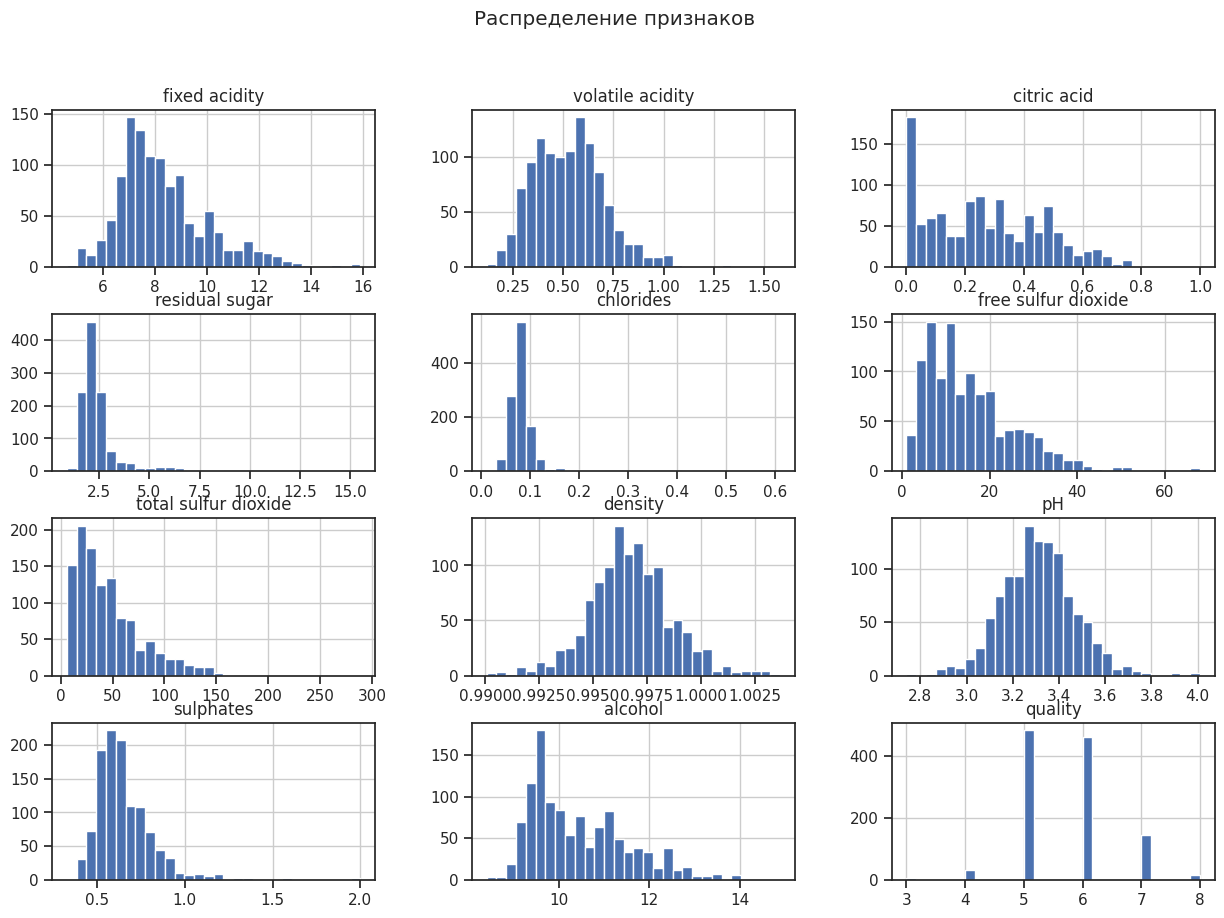

In [9]:
# Распределение целевой переменной (качество вина)
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data)
plt.title('Распределение качества вина')
plt.show()

#удаляем столбец id
data = data.drop(columns=["Id"])

# Построение распределения для каждого признака
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Распределение признаков')
plt.show()

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей

Для построения моделей будем использовать все признаки кроме признака id., потому что он определяет только порядковй номер.

Категориальные признаки отсутсвуют.

Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

### Масштабирование данных

In [10]:
# Числовые колонки для масштабирования
scale_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [11]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [12]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [13]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,volatile acidity_scaled,citric acid_scaled,residual sugar_scaled,chlorides_scaled,free sulfur dioxide_scaled,total sulfur dioxide_scaled,density_scaled,pH_scaled,sulphates_scaled,alcohol_scaled
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846


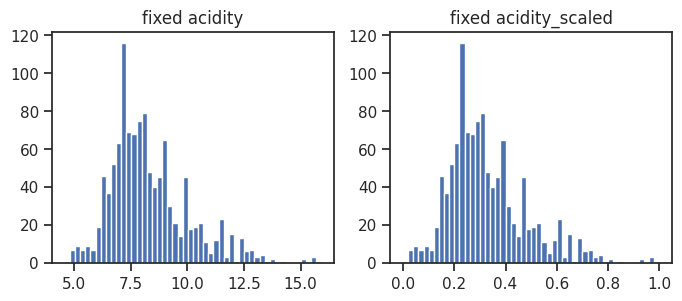

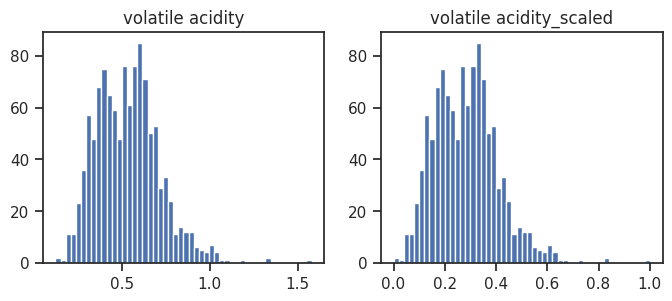

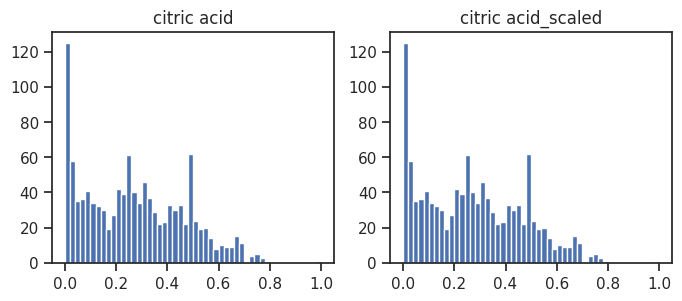

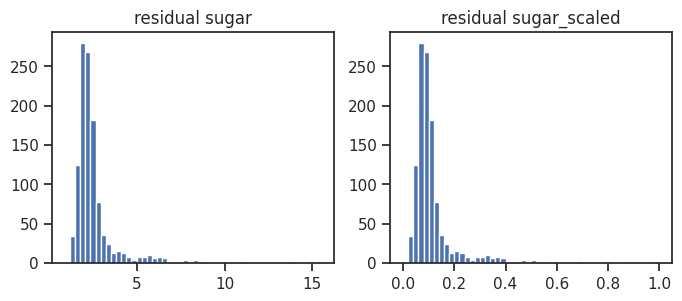

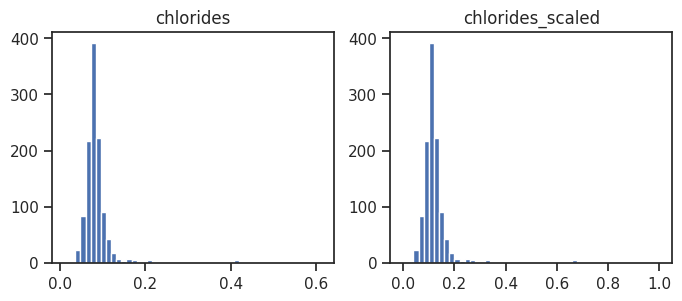

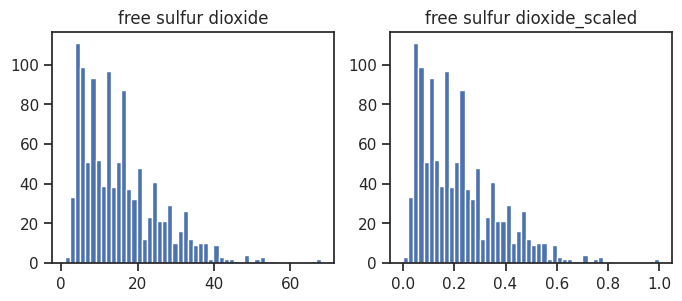

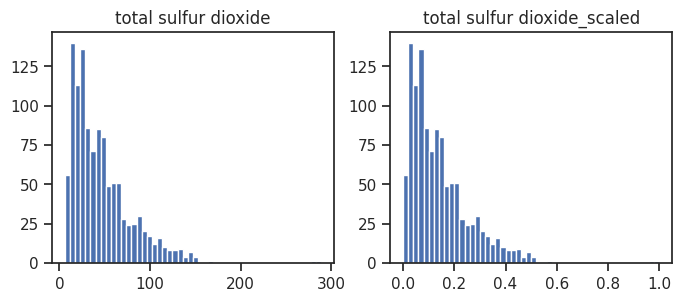

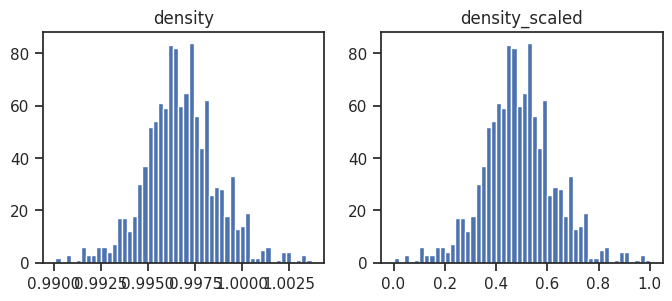

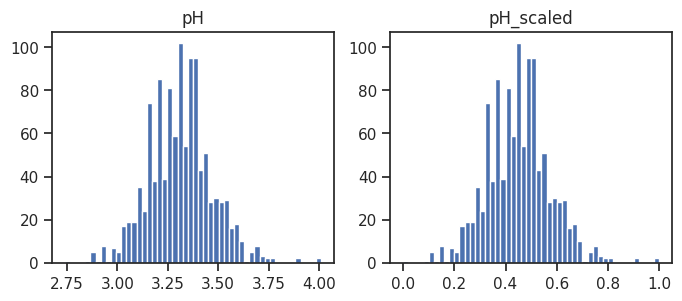

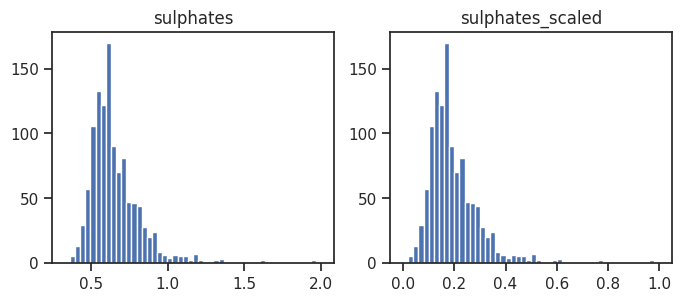

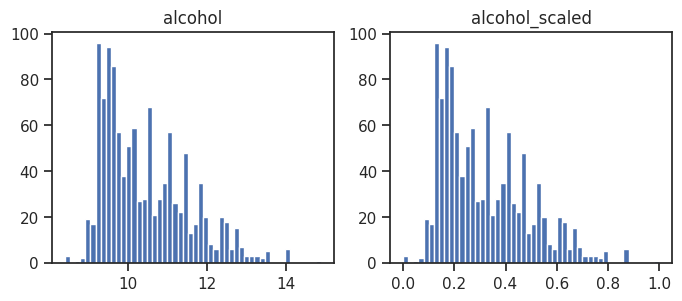

In [14]:
# Проверим, что масштабирование не повлияло на распределение данных
scale_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [15]:
print(data.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'fixed acidity_scaled',
       'volatile acidity_scaled', 'citric acid_scaled',
       'residual sugar_scaled', 'chlorides_scaled',
       'free sulfur dioxide_scaled', 'total sulfur dioxide_scaled',
       'density_scaled', 'pH_scaled', 'sulphates_scaled', 'alcohol_scaled'],
      dtype='object')


In [16]:
corr_cols_1 = scale_cols + ['quality']
corr_cols_1

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [17]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['quality']
corr_cols_2

['fixed acidity_scaled',
 'volatile acidity_scaled',
 'citric acid_scaled',
 'residual sugar_scaled',
 'chlorides_scaled',
 'free sulfur dioxide_scaled',
 'total sulfur dioxide_scaled',
 'density_scaled',
 'pH_scaled',
 'sulphates_scaled',
 'alcohol_scaled',
 'quality']

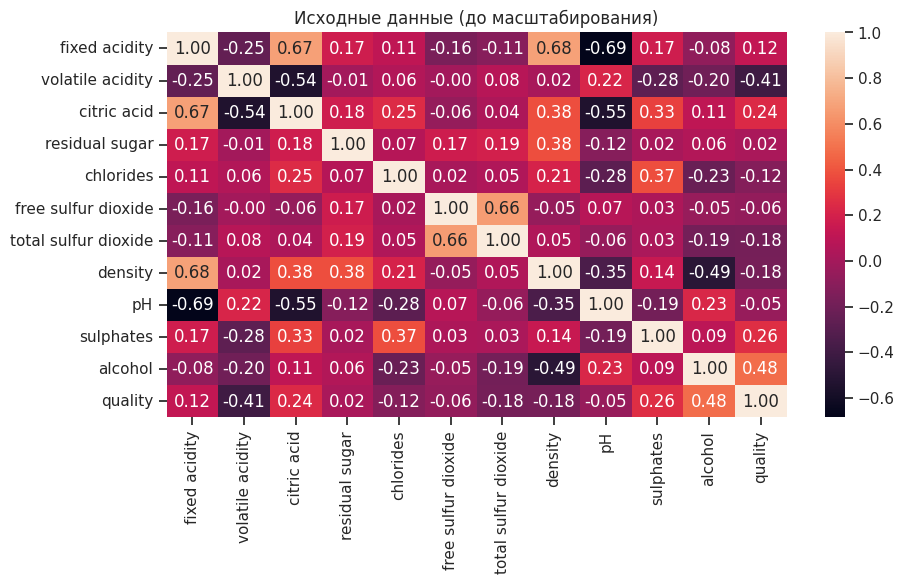

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

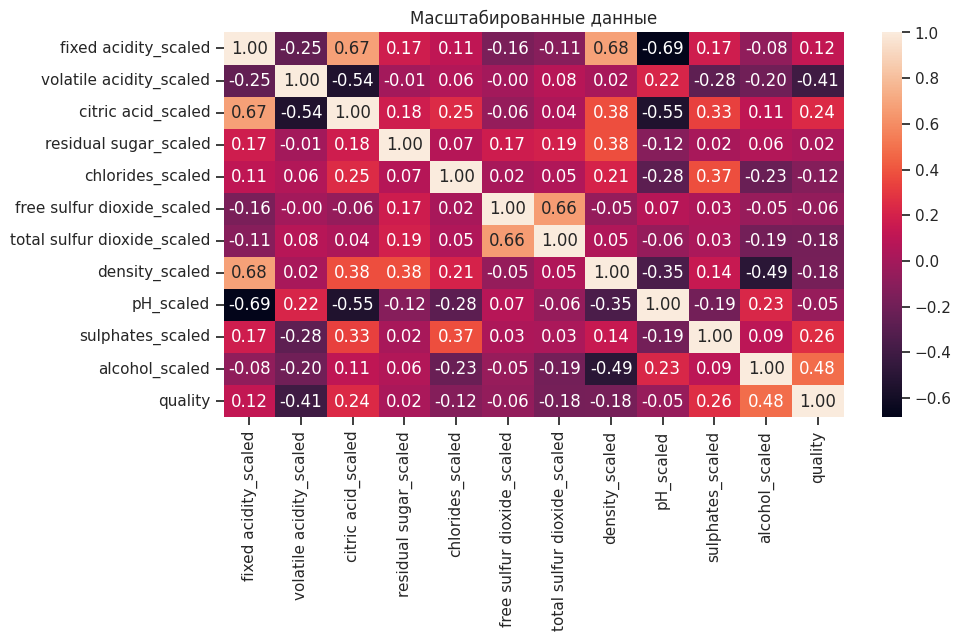

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()


In [20]:
correlations = data[corr_cols_1].corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


In [21]:
selected_features = correlations[abs(correlations) > 0.2].index.drop('quality')
print(selected_features)

Index(['alcohol', 'sulphates', 'citric acid', 'volatile acidity'], dtype='object')


Исходя из результатов корреляционного анализа, мы видим следующее:

Алкоголь (alcohol) имеет наибольшую положительную корреляцию с качеством вина (quality) (коэффициент корреляции ≈ 0.48). 

Содержание сульфатов (sulphates) и лимонная кислота (citric acid) также имеют положительную корреляцию с качеством вина (коэффициенты корреляции около 0.26 и 0.24 соответственно).

Летучая кислотность (volatile acidity) имеет наибольшую отрицательную корреляцию с качеством вина (коэффициент корреляции ≈ -0.41). 

Из этих результатов можно сделать вывод, что переменные, такие как алкоголь, содержание сульфатов и лимонная кислота, вероятно, будут важными при построении модели для прогнозирования качества вина. Также стоит обратить внимание на переменные, имеющие негативную корреляцию с качеством вина, такие как летучая кислотность.

## Выбор метрик для последующей оценки качества моделей.

### В качестве метрик для решения задачи регрессии будем использовать:

#### Mean absolute error - средняя абсолютная ошибка

$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert  y_i - \hat{y_i} \rvert $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции [mean_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

#### Mean squared error - средняя квадратичная ошибка

$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Вычисляется с помощью функции [mean_squared_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

#### Метрика $R^2$ или коэффициент детерминации
$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки
- $\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $

Вычисляется с помощью функции [r2_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

#### Сохранение и визуализация метрик

In [22]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = pd.concat([self.df, pd.DataFrame(temp)], ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()  

### Выбор наиболее подходящих моделей для решения задачи регрессии

Для задачи регрессии будем использовать следующие модели:

- Линейная регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

### Формирование обучающей и тестовой выборок на основе исходного набора данных

In [23]:
selected_features = ['fixed acidity_scaled', 'citric acid_scaled']
features = data.loc[:, selected_features]
regr_X_train, regr_X_test, regr_Y_train, regr_Y_test = train_test_split(features, data["pH"], test_size=0.2, random_state=1)

In [24]:
regr_X_train.shape, regr_X_test.shape, regr_Y_train.shape, regr_Y_test.shape

((914, 2), (229, 2), (914,), (229,))

### Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [25]:
# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [26]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [27]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(regr_X_train, regr_Y_train)
    Y_pred = model.predict(regr_X_test)
    
    mae = mean_absolute_error(regr_Y_test, Y_pred)
    mse = mean_squared_error(regr_Y_test, Y_pred)
    r2 = r2_score(regr_Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

In [28]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LR 	 MAE=0.086, MSE=0.014, R2=0.489
KNN_5 	 MAE=0.091, MSE=0.014, R2=0.493
SVR 	 MAE=0.081, MSE=0.011, R2=0.577
Tree 	 MAE=0.095, MSE=0.02, R2=0.275
RF 	 MAE=0.087, MSE=0.014, R2=0.475
GB 	 MAE=0.08, MSE=0.011, R2=0.582


### Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [29]:
# n_range = np.array(range(1,2000,100))
# n_samples_fit = regr_X_train.shape[0]
# tuned_parameters = {'n_neighbors': list(range(1, min(n_samples_fit, 50)))}
n_range = np.array(range(1,900,100))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1, 101, 201, 301, 401, 501, 601, 701, 801])}]

In [30]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 1.89 s, sys: 9.96 ms, total: 1.9 s
Wall time: 829 ms


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1, 101, 201, 301, 401, 501, 601, 701, 801])}],
             scoring='neg_mean_squared_error')

In [31]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor(n_neighbors=101)

In [32]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 101}

In [33]:
regr_gs_best_params_txt = str(regr_gs.best_params_['n_neighbors'])
regr_gs_best_params_txt

'101'

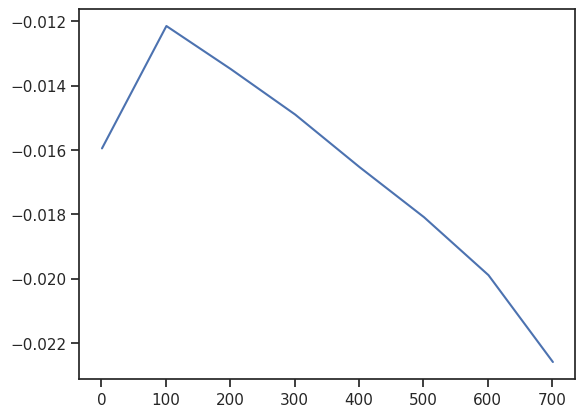

In [34]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

### Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [35]:
regr_models_grid = {'KNN_5':KNeighborsRegressor(n_neighbors=5), 
                    str('KNN_'+regr_gs_best_params_txt):regr_gs.best_estimator_}

In [36]:
    regr_train_model(model_name, model, regrMetricLogger)

GB 	 MAE=0.08, MSE=0.011, R2=0.582


### Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [37]:
# Метрики качества модели
regr_metrics = np.array(['MAE', 'MSE', 'R2'])

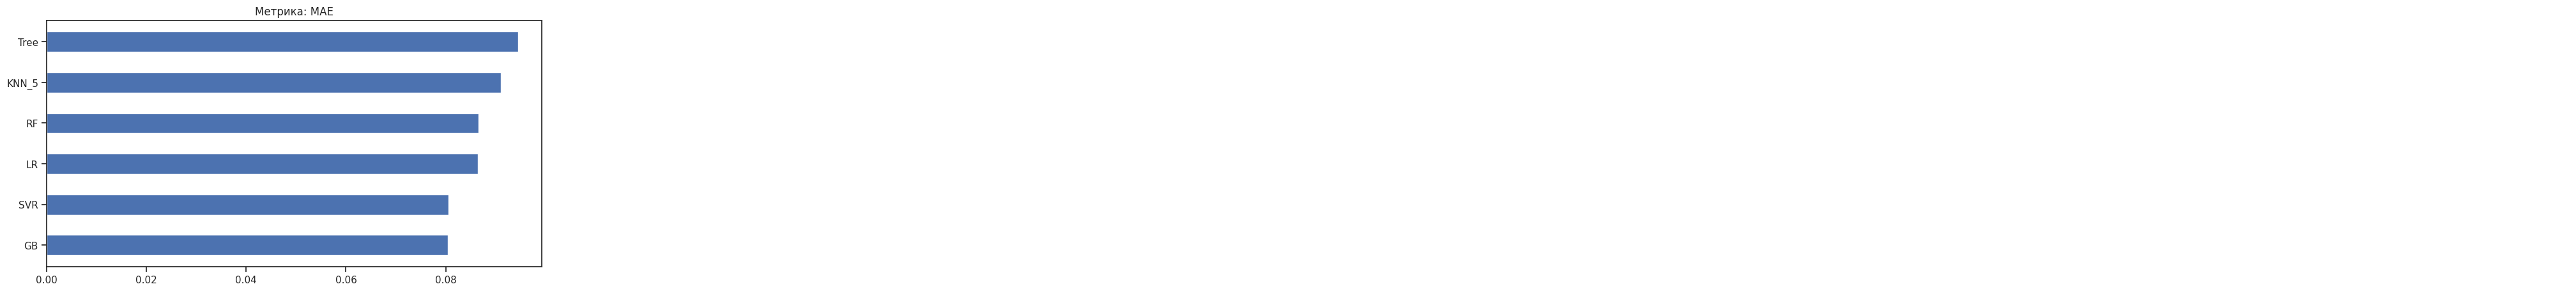

In [38]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=True, figsize=(10, 5))

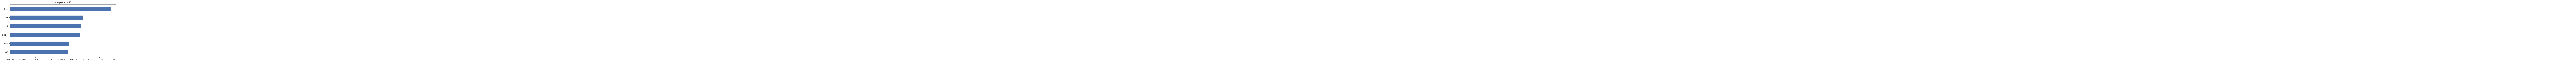

In [39]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=True, figsize=(10, 5))

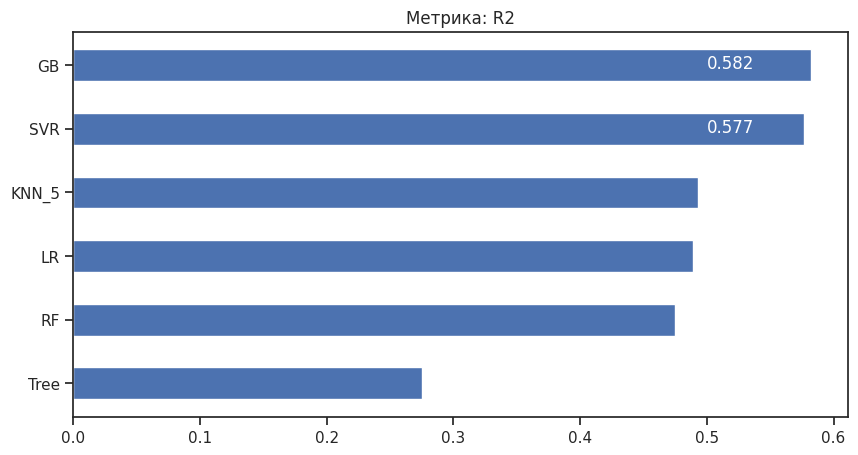

In [40]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(10, 5))

**Вывод: лучшими оказались модели на основе градиентного бустинга и метода опорных векторов. При отдельных запусках вместо метода опорных векторов оказывается лучшей модель ближайших соседей.**